dist = Exponential{Float64}(θ=1.0)
n = 1000
μ = mean(dist) = 1.0
σ = std(dist) = 1.0


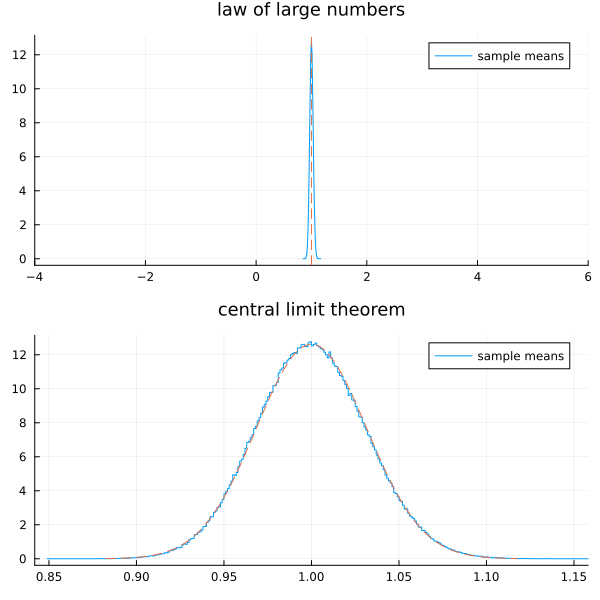

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, titlefontsize=12)

function plot_lln_clt(dist, n; L=10^6)
    @show dist
    @show n
    @show μ = mean(dist)
    @show σ = std(dist)
    X̄ = zeros(L)
    Xtmp = [zeros(eltype(dist), n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(dist, Xtmp[tid])
        X̄[i] = mean(X)
    end
    P = stephist(X̄; norm=true, label="sample means")
    vline!([μ]; label="", ls=:dash)
    plot!(xlim=(μ - 5σ, μ + 5σ))
    title!("law of large numbers")
    Q = stephist(X̄; norm=true, label="sample means")
    plot!(Normal(μ, σ/√n); label="", ls=:dash)
    plot!(xlim=(μ - 5σ/√n, μ + 5σ/√n))
    title!("central limit theorem")
    plot(P, Q; size=(600, 600), layout=(2, 1))
end

plot_lln_clt(Exponential(), 1000)

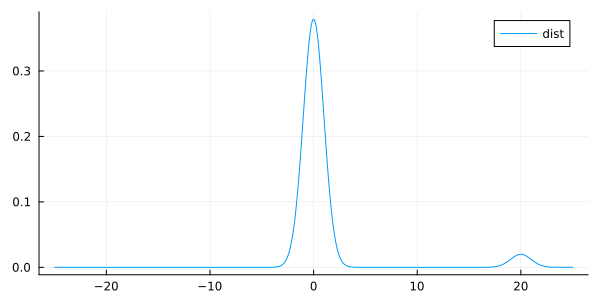

In [2]:
dist = MixtureModel([Normal(), Normal(20)], [0.95, 0.05])
plot(dist, -25, 25; label="dist", size=(600, 300))

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 10
μ = mean(dist) = 1.0
σ = std(dist) = 4.47213595499958


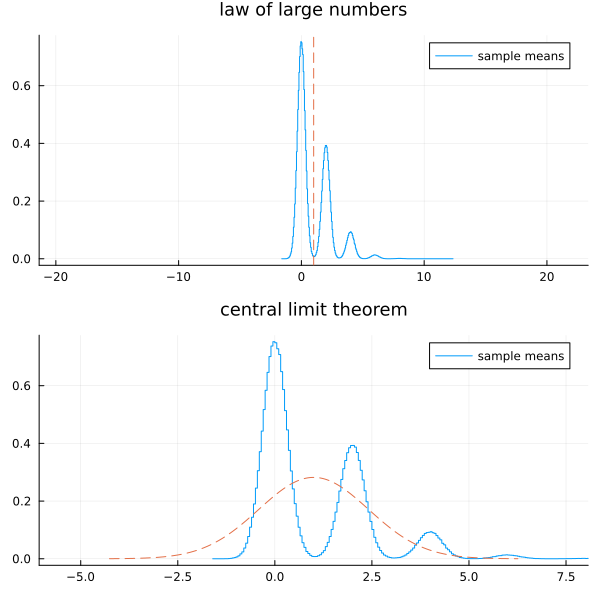

In [3]:
plot_lln_clt(dist, 10)

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 20
μ = mean(dist) = 1.0
σ = std(dist) = 4.47213595499958


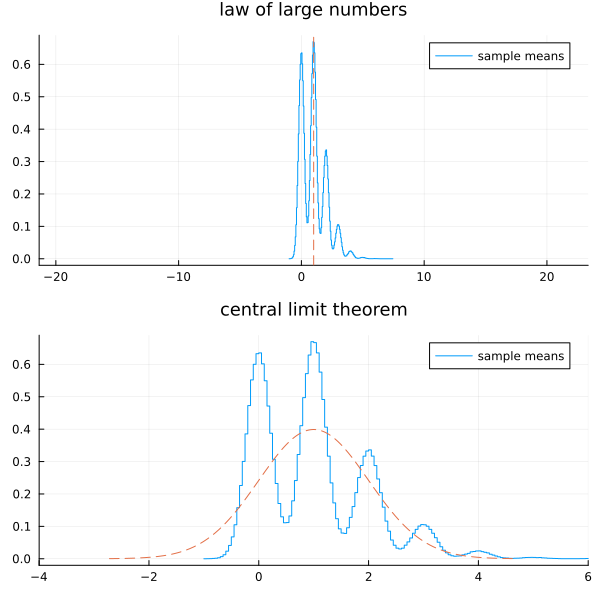

In [4]:
plot_lln_clt(dist, 20)

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 100
μ = mean(dist) = 1.0
σ = std(dist) = 4.47213595499958


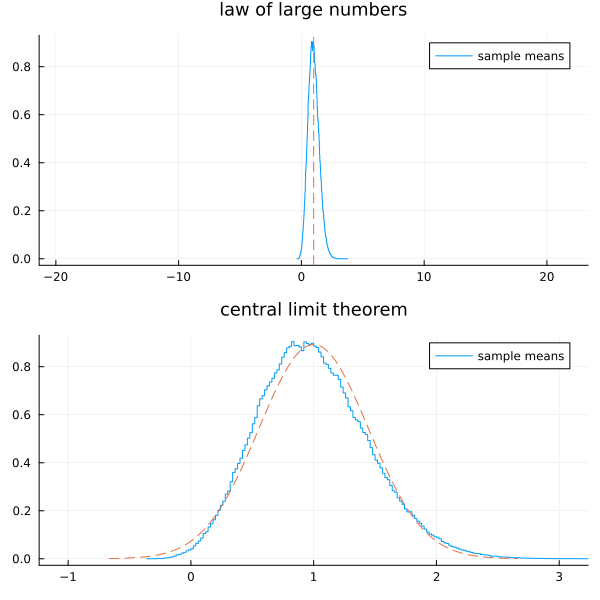

In [5]:
plot_lln_clt(dist, 100)

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 1000
μ = mean(dist) = 1.0
σ = std(dist) = 4.47213595499958


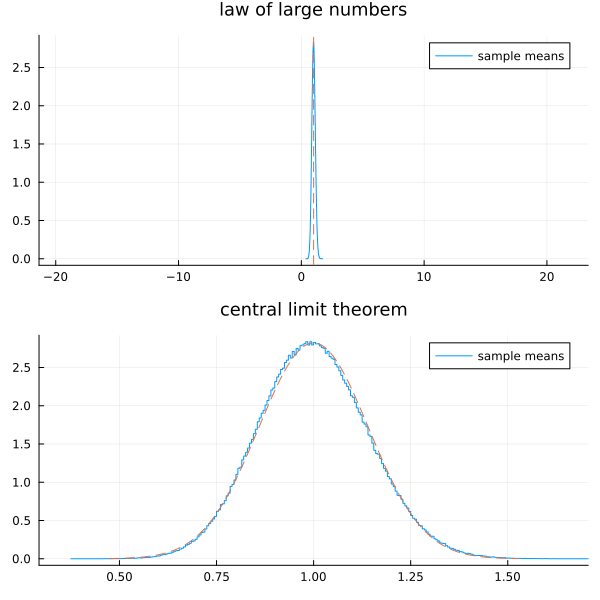

In [6]:
plot_lln_clt(dist, 1000)

dist = Binomial{Float64}(n=10000, p=0.3)
n = 10000
μ = mean(dist) = 3000.0
σ = std(dist) = 45.8257569495584


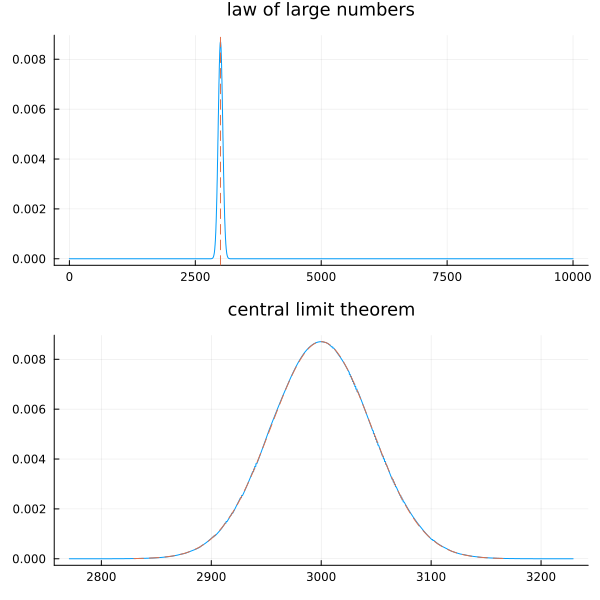

In [7]:
function plot_lln_clt_disc(dist, n=ntrials(dist); L=10^5)
    @show dist
    @show n
    @show μ = mean(dist)
    @show σ = std(dist)
    P = plot(x -> pdf(dist, round(x)),
        max(minimum(dist)-1, μ-5√n*σ), min(maximum(dist)+1, μ+5√n*σ); norm=true, label="")
    vline!([μ]; label="", ls=:dash)
    title!("law of large numbers")
    Q = plot(x -> pdf(dist, round(x)), μ - 5σ, μ + 5σ; norm=true, label="")
    plot!(Normal(μ, σ); label="", ls=:dash)
    title!("central limit theorem")
    plot(P, Q; size=(600, 600), layout=(2, 1))
end

plot_lln_clt_disc(Binomial(10000, 0.3))

dist = Hypergeometric(ns=30000, nf=70000, n=10000)
n = 10000
μ = mean(dist) = 3000.0
σ = std(dist) = 43.474347610849804


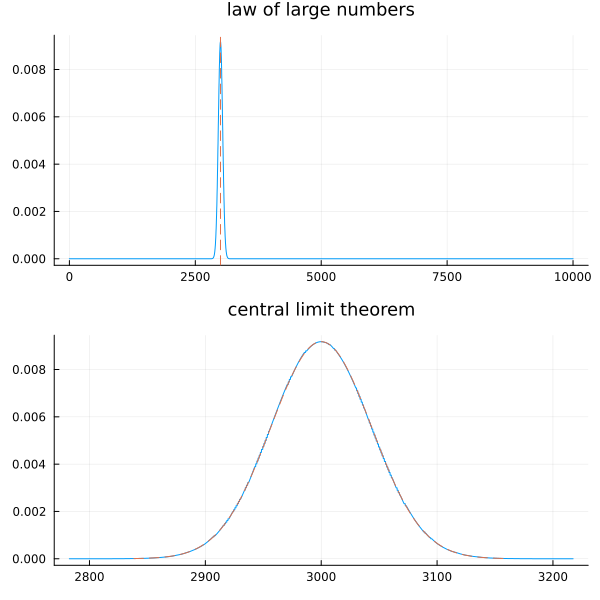

In [8]:
plot_lln_clt_disc(Hypergeometric(30000, 70000, 10000), 10000)

dist = BetaBinomial{Float64}(n=10000, α=3000.0, β=7000.0)
n = 10000
μ = mean(dist) = 3000.0
σ = std(dist) = 64.80416685673693


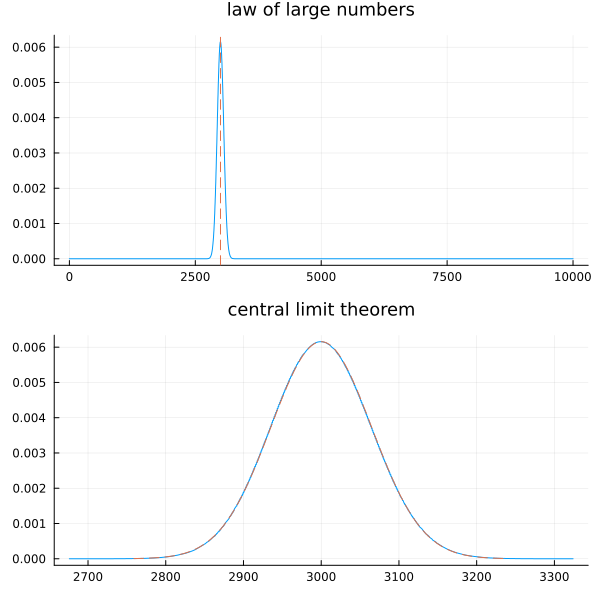

In [9]:
plot_lln_clt_disc(BetaBinomial(10000, 3000, 7000))

dist = Poisson{Float64}(λ=1000.0)
n = 1000
μ = mean(dist) = 1000.0
σ = std(dist) = 31.622776601683793


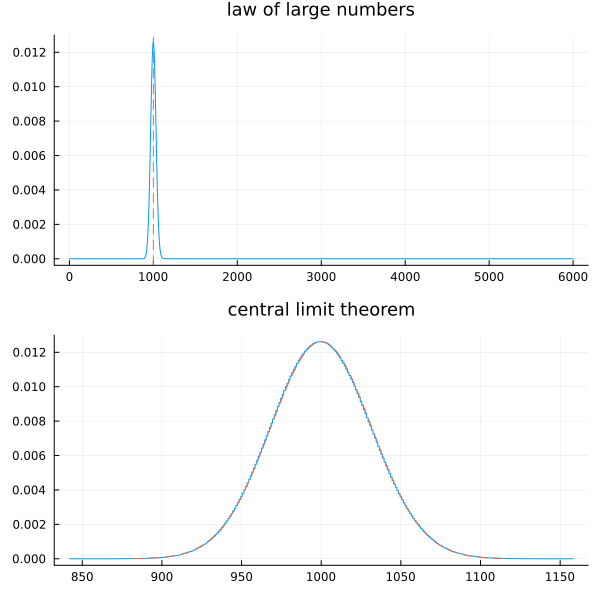

In [10]:
plot_lln_clt_disc(Poisson(1000), 1000)